# Домашнее задание 9

(прислать до 02:00 13.11.2018)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 
Если возникает ошибка, то я сообщаю Вам об этом и жду исправленного решения, которое будет удовлетворять указанному требованию.

## Задача 1

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- Как связаны между собой задачи минимизации $f$ и $g$?
- Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

- Для выпуклых функций условие первого порядка является достаточным. Отсюда $\arg\min\limits_{x} g(x)= x^{*}: (\phi(f(x^{*})))' = \phi'(f(x^{*})) \nabla f(x^{*})^{\top} = 0 $. Из условия возрастания получаем $\phi'(f(x)) \geqslant 0$. Если $ \phi'(f(x)) \gneq 0 $, то $ \arg\min\limits_{x} g(x) = \arg\min\limits_{x} f(x) $, иначе $ \arg\min\limits_{x} g(x) = \{x\ |\ \exists c: \phi'(c) = 0,\ f(x) = c \} \cup \arg\min\limits_{x} f(x) $  
Отсюда следует, что для минимизации $g(x)$ необходимо минимизировать $f(x)$ (но не всегда достаточно).
- **Градиентный спуск:** В каждой точке направления наискорейшего убывания будут пропорциональны. Отсюда при подборе шага методом наискорейшего шага последовательности точек можно сделать одинаковыми (достаточно выбирать оптимальные коэффициенты согласованно).
  $$  
    \begin{aligned}
    &f(x): x_{k+1} = x_{k} - \alpha_{k} \nabla f(x_k)^{\top}\\
    &g(x): x_{k+1} = x_{k} - \beta_{k} \nabla g(x)^{\top} = x_{k} - \beta_{k} \phi'(f(x_k)) \nabla f(x_k)^{\top}
    \end{aligned}
  $$
  **Метод Ньютона:** 
  $$
    f(x):  x_{k+1} = x_{k} - \left(\nabla^{2} f(x_k)\right)^{-1} \nabla f(x_k)^{\top}\\
    g(x):  x_{k+1} = x_{k} - \left(\nabla^{2} g(x_k)\right)^{-1} \nabla g(x_k)^{\top}
  $$
  Распишем вторую строку:
  $$
       \nabla^{2} g(x) = \nabla f(x)^{\top} \phi''(f(x)) \nabla f(x) + \phi'(f(x)) \nabla^2 f(x)\\
     \begin{aligned}
       x_{k+1} &= x_{k} - \left(\nabla f(x_k)^{\top} \phi''(f(x_k)) \nabla f(x_k) + \phi'(f(x_k)) \nabla^2 f(x_k)\right)^{-1} \phi'(x_k) \nabla f(x_k)^{\top}\\
       &= x_{k} - \left(\nabla f(x_k)^{\top} \frac{\phi''(f(x_k))}{\phi'(f(x_k))} \nabla f(x_k) + \nabla^2 f(x_k)\right)^{-1} \nabla f(x_k)^{\top}
    \end{aligned}
  $$
  Отсюда тяжело судить о наличии какой-либо связи между направлениями, в отличие от предыдущего метода.

# Место для Вашего решения

## Задача 2

Для задачи
$$
\ln (e^x + e^{-x}) \to \min
$$
запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
А что произойдёт, если использовать демпфированный метод Ньютона? Почему?
Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

$$
    f(x) := \ln(e^x + e^{-x}) = \ln (2\cosh(x)) \\
    \nabla f(x) = \frac{\sinh(x)}{\cosh(x)} = \tanh(x)\\
    \nabla^2 f(x) = \cosh^{-2}(x)
$$

In [16]:
from collections import defaultdict
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import rosen, rosen_der, rosen_hess

%autosave 15
%matplotlib notebook
np.ALLOW_THREADS = True

Autosaving every 15 seconds


In [17]:
def plot_convergence_1d(func, steps, title="Successive Newton's method estimates", arrow_kwargs={}):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.set_title(title)
    grid = np.linspace(np.min(steps[:, 0]), np.max(steps[:, 0]), 100)
    fgrid = func(grid)
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)
    for i, step in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                step[0], step[1], 
                steps[i+1][0] - step[0],
                steps[i+1][1] - step[1], 
                **arrow_kwargs
            )
            ax.annotate("{}".format(i+1), 
                        (step[0], step[1] + 0.01 * yrange),
                        size=14)
    ax.scatter(steps[:, 0], steps[:, 1], verts=5)
    ax.scatter(*steps[-1], color="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    plt.show()

In [18]:
def opt_newton_1d(f, grad, hess, step_size, x0, eps=1e-5, callback=None):
    x = x0
    steps = [(x0, f(x0))]
    gradnorms = []
    curr_grad = grad(x)
    while np.linalg.norm(curr_grad) >= eps:
        h = -curr_grad / hess(x)
        alpha = step_size(x, h, f, grad)
        x = x + alpha * h
        steps.append((x, f(x)))
        gradnorms.append(np.linalg.norm(curr_grad))
        curr_grad = grad(x)
    return np.vstack(steps), gradnorms


def unit_step_size(*args):
    return 1


def armijo_step_size_1d(rho, beta, x, h, f, grad):
    assert beta < 0.5, "Armijo rule is applicable for beta less than 0.5"
    assert rho < 1, "Decay factor has to be less than 1"
    alpha = 1
    x_next = x + alpha * h
    while True:
        if np.isnan(f(x_next)):
            alpha *= rho
        else:
            if f(x_next) >= f(x) + beta * grad(x) * (x_next - x):
                alpha *= rho
            else:
                break
        if alpha < 1e-16:
            break
        x_next = x + alpha * h
    return alpha

In [19]:
def f(x):
    return np.log(2 * np.cosh(x))


def grad(x):
    return np.tanh(x)


def hess(x):
    return 1 / np.cosh(x)**2


gradnorms = defaultdict()

In [20]:
%%time
steps_1_unit, gradnorms["1_unit"] = opt_newton_1d(
    f, grad, hess,
    step_size=unit_step_size,
    x0=1
)
print(steps_1_unit)

[[ 1.00000000e+00  1.12692801e+00]
 [-8.13430204e-01  9.92869009e-01]
 [ 4.09402317e-01  7.74710797e-01]
 [-4.73049165e-02  6.94265641e-01]
 [ 7.06028036e-05  6.93147183e-01]
 [-2.34625145e-13  6.93147181e-01]]
CPU times: user 2.18 ms, sys: 230 µs, total: 2.41 ms
Wall time: 1.78 ms


<IPython.core.display.Javascript object>


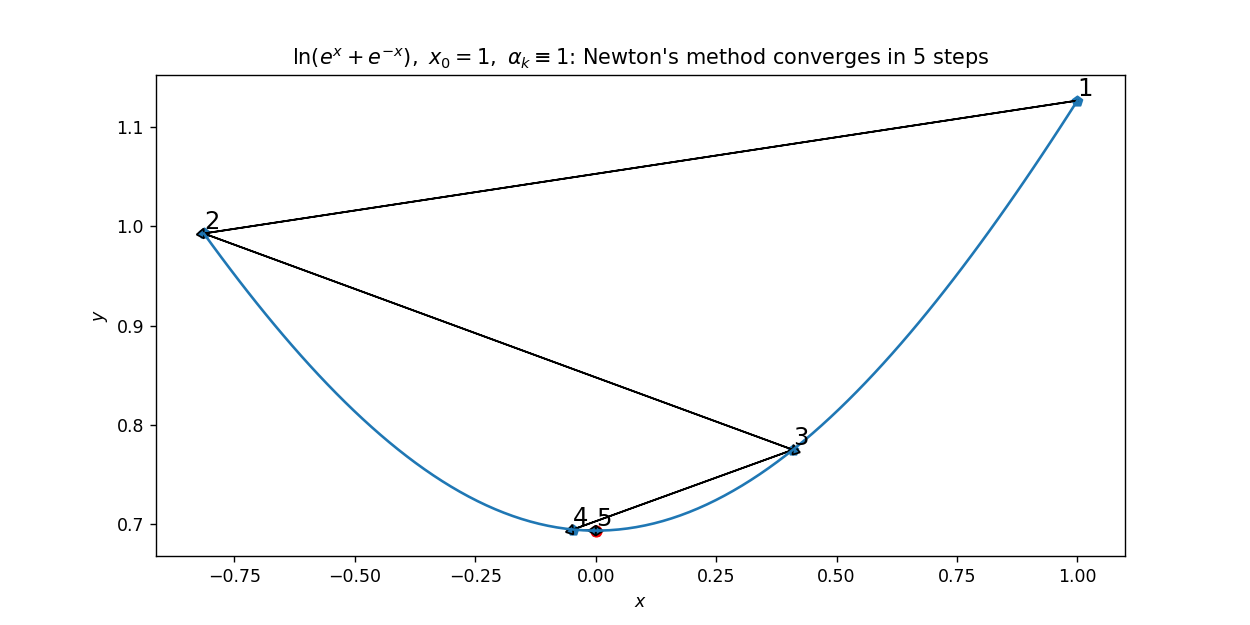

In [21]:
plot_convergence_1d(
    f, 
    steps_1_unit,
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1,\ \alpha_k \equiv 1$: Newton's method converges in 5 steps",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

In [22]:
%%time
steps_1_1_unit, gradnorms["1_1_unit"] = opt_newton_1d(
    f, grad, hess,
    step_size=unit_step_size,
    x0=1.1
)
print(steps_1_1_unit)

[[ 1.10000000e+00  1.20508332e+00]
 [-1.12855259e+00  1.22808384e+00]
 [ 1.23413113e+00  1.31546406e+00]
 [-1.69516598e+00  1.72830815e+00]
 [ 5.71536010e+00  5.71537096e+00]
 [-2.30213565e+04             inf]
 [            inf             inf]
 [            nan             nan]]
CPU times: user 1.1 ms, sys: 107 µs, total: 1.2 ms
Wall time: 1.15 ms


/home/vvi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in cosh
  from ipykernel import kernelapp as app
/home/vvi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in cosh
/home/vvi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
/home/vvi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


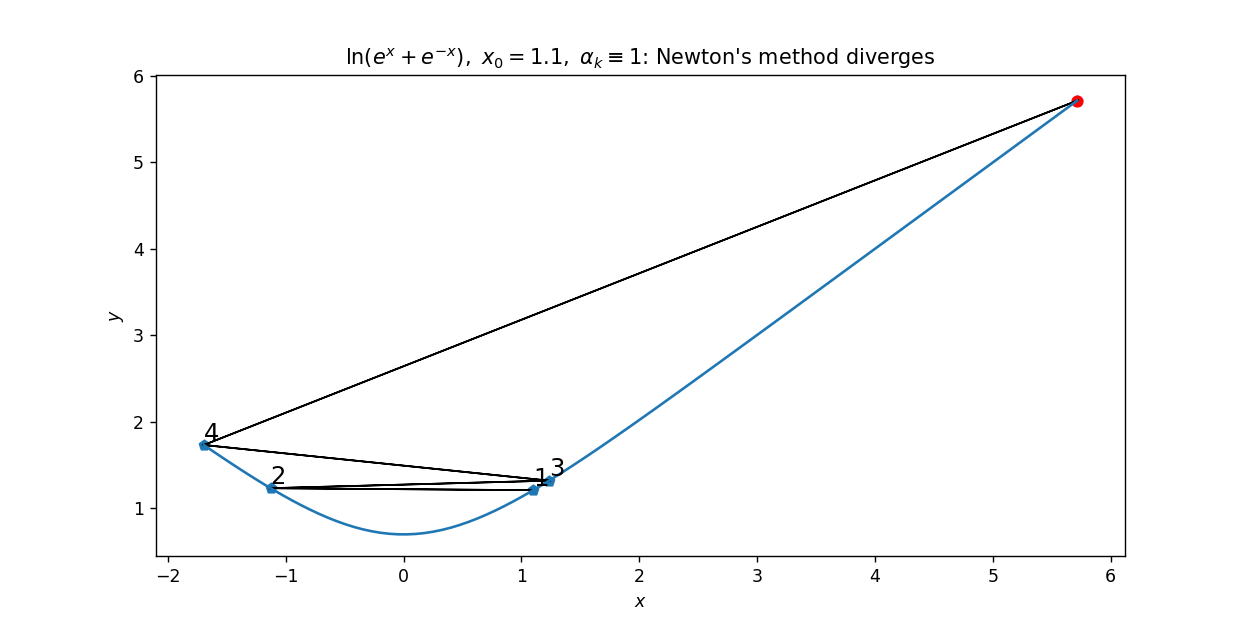

In [24]:
plot_convergence_1d(
    f,
    steps_1_1_unit[:-3,:],
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1.1,\ \alpha_k \equiv 1$: Newton's method diverges",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

Видим, что метод Ньютона расходится, хотя точка очень близка к $x_0=1$. Посмотрим на зависимость направления от текущей точки:

<IPython.core.display.Javascript object>


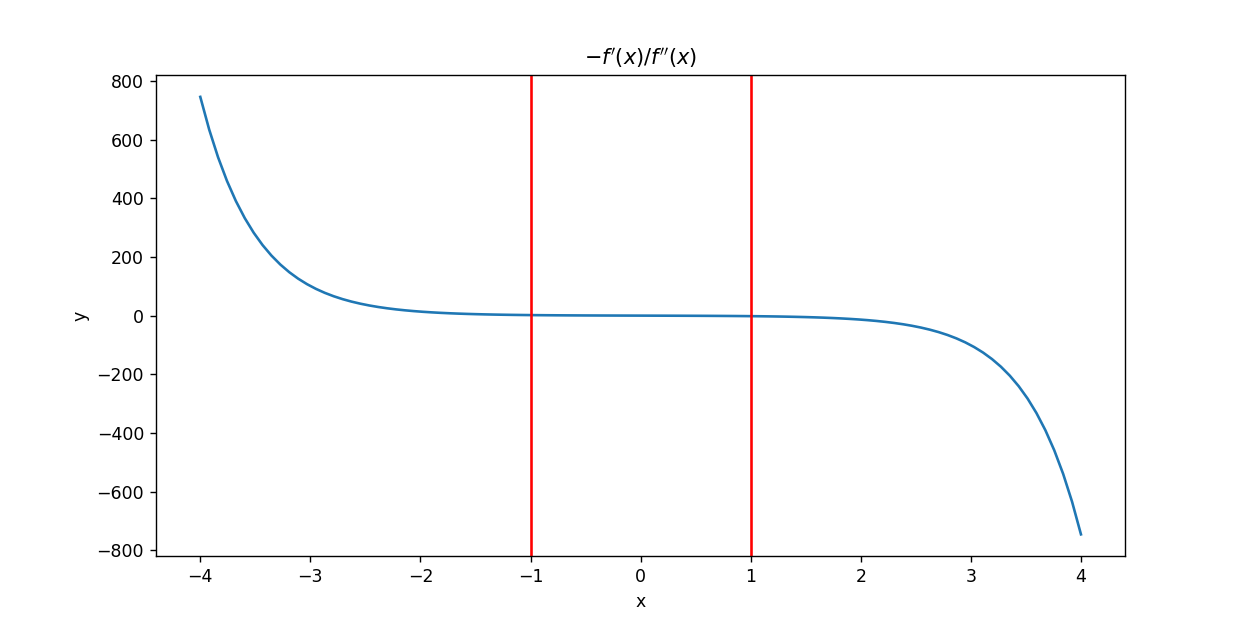

In [23]:
grid = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 5))
plt.title(r"$-f'(x)/f''(x)$")
plt.xlabel("x");
plt.ylabel("y");
plt.plot(grid, -grad(grid)/hess(grid));
for x in [-1, 1]:
    plt.axvline(x, color="r")

Видим, что за пределами отрезка $[-1, 1]$ норма направления начинает экспоненциально расти. Отсюда очевидно, что константный — плохая идея: нужно подбирать его так, чтобы скорость изменялась контролируемо, а убывание можно было гарантировать. Под такое описание хорошо подходит, к примеру, демпфированный по Армихо метод Ньютона:

In [25]:
%%time
steps_1_1_armijo, gradnorms["1_1_armijo"] = opt_newton_1d(
    f, grad, hess,
    step_size=partial(armijo_step_size_1d, 0.5, 0.03),
    x0=1.1
)
print(steps_1_1_armijo)

[[ 1.10000000e+00  1.20508332e+00]
 [-1.42762926e-02  6.93249083e-01]
 [ 1.93987063e-06  6.93147181e-01]]
CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 786 µs


<IPython.core.display.Javascript object>


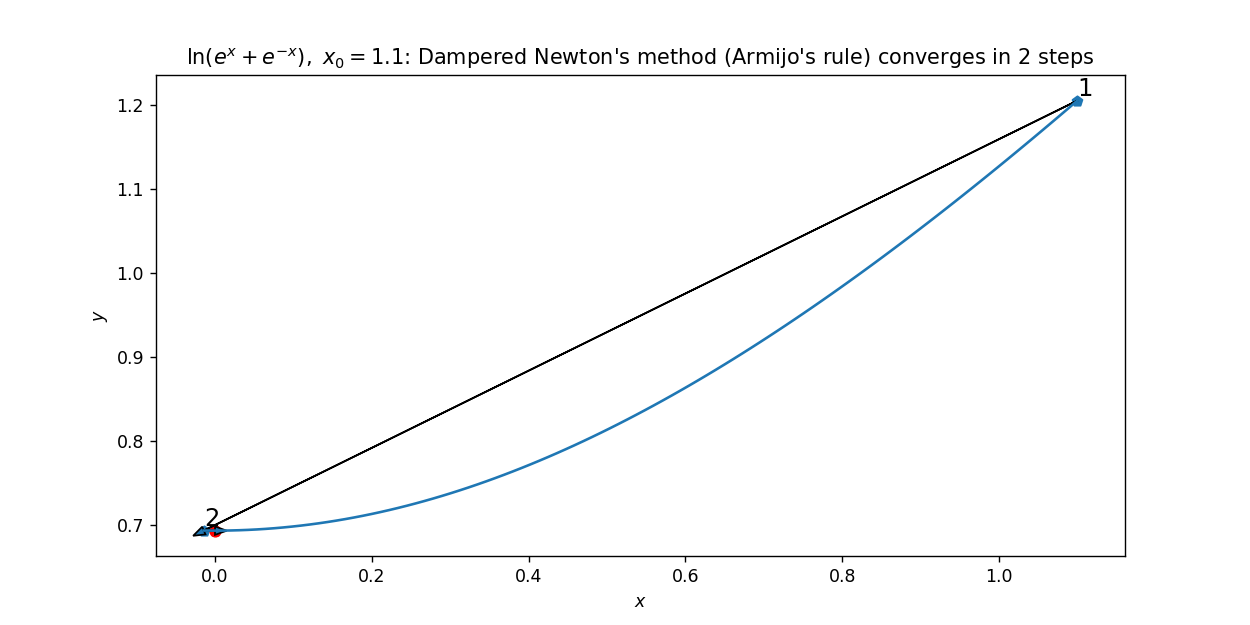

In [26]:
plot_convergence_1d(
    f,
    steps_1_1_armijo,
    title=r"$\ln(e^{x}+e^{-x}),\ x_0 = 1.1$: Dampered Newton's method (Armijo's rule) converges in 2 steps",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

In [ ]:
labels = {
    "1_unit" : r"$x_0 = 1,\ \alpha_k \equiv 1$",
    "1_1_unit" : r"$x_0 = 1.1,\ \alpha_k \equiv 1$",
    "1_1_armijo" : r"$x_0 = 1.1$, Armijo's rule"
}

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.title("Gradient norms of successive steps in dampered Newton's method")
for key, val in gradnorms.items():
    ax.plot(val, label=labels[key])
plt.xlabel("iteration")
plt.ylabel("gradient norm")
ax.legend()
plt.show()

## Задача 3
- Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- Выведите формулу для $H_k$ в методе DFP
- Реализуйте BFGS метод и сравните его сходимость с методом Ньютона для функции Розенброка из $x_0 = (-1.2, 1)$ и для задачи поиска аналитического центра. Попробуйте разные условия (достаточного убывания, существенного убывания, условие кривизны) для выбора шага $\alpha_k$ (сравните минимум два условия), всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

# Место для Вашего решения

Докажем индукцией по построению:
* **База индукции:** $B_0 = \gamma I \succeq 0$
* **Шаг индукции:**  
  Введём обозначения $M := I - \rho_k s_k y_k^\top,\ \rho_k := \frac{1}{s_k^\top y_k}$.  
  В них: $B_{k+1} = М^\top B_k М + \rho_k y_k y_k^\top$.  
  По ПИ $B_k \succeq 0$, откуда если $s_k^\top y_k > 0$, то: $x^\top B_{k+1} x = (Mx)^\top B_k (Mx) + \rho_k (x^\top y_k)^2 > 0$.  
  Если же $y_k^{\top} s_{k} \leqslant 0$, то:
  $$
    \begin{align*}
    B_{k+1} s_k  &= M^\top B_k M s_k + \rho_k y_k (y_k^\top s_k) =\\ 
    &= M^\top B_k (I - \rho_k s_ky_k^\top)s_k + y_k =\\
    &= M^\top B_k s_k - M^\top B_k s_k \rho_k (y_k^\top x_k) + y_k =\\
    &= y_k \implies s_k^\top B_{k+1}s_k = s_k^\top y_k \leqslant 0
    \end{align*}
  $$

Значит, для того $B_{k+1} \succeq 0$, необходимо и достаточно $s_k^\top y_k > 0$.

На лекции рекомендовали воспользоваться формулой Шермана-Моррисона-Вудбери:
$$\left(A + UCV\right)^{-1} = A^{-1} - A^{-1}U \left(C^{-1}+VA^{-1}U \right)^{-1} VA^{-1}$$

В этих обозначениях имеем: 
$A := B_k, U := \begin{bmatrix}y_k & B_k s_k\end{bmatrix}, C := \begin{bmatrix}\rho_k + \rho_k^2 s_k^\top B_k s_k & -\rho_k \\ -\rho_k & 0\end{bmatrix}, V := \begin{bmatrix}y_k^\top \\s_k^\top B_k \end{bmatrix}$. Тогда 
$$
\begin{align*}
  &H_{k+1} = B_{k+1}^{-1} = (A + UCV)^{-1} = A^{-1} - A^{-1}U \left(C^{-1}+VA^{-1}U \right)^{-1} VA^{-1}\\
  &C^{-1} + VA^{-1}U = \frac{-1}{\rho_k}\begin{bmatrix}0&1\\1&1+\rho_k s_k^\top B_k s_k\end{bmatrix} + \begin{bmatrix}y_k^\top B_k^{-1}y_k & y_k^\top s_k\\s_k^\top y_k & s_k^\top B_k s_k\end{bmatrix} = \begin{bmatrix}y_k^\top B_k^{-1}y_k&0\\0&-s_k^\top y_k\end{bmatrix}\\
  &U\left(C^{-1}+VA^{-1}U \right)^{-1}V = U\begin{bmatrix}\frac{1}{y_k^\top B_k^{-1} y_k}&0\\0&-\rho_k\end{bmatrix}V = \dfrac{y_k y_k^\top}{y_k^\top B_k^{-1}y_k} - \dfrac{B_k s_k s_k^\top B_k}{s_k^\top y_k}
\end{align*}
$$
$$
\begin{align*}
  H_{k+1} &= A^{-1} - A^{-1}\left(\frac{y_k y_k^\top}{y_k^\top B_k^{-1} y_k} - \frac{B_k s_k s_k^\top B_k}{s_k^\top y_k}\right)A^{-1} =\\
  &= B_k^{-1} - \frac{B_k^{-1}y_k y_k^\top B_k^{-1}}{y_k^\top B_k^{-1} y_k} + \rho_k s_k s_k^\top =\\
  &= H_k - \dfrac{H_k y_k y_k^\top H_k}{y_k^\top H_k y_k} + \rho_k s_k s_k^\top
\end{align*}
$$

In [106]:
def newton(f, grad, hess, stop_criterion, step_size, x0, tol=1e-8, max_iters=1000, callback=None):
    x = x0
    if callback is not None:
        callback(x)
    for i in range(max_iters):
        h = -np.linalg.inv(hess(x)).dot(grad(x))
        if stop_criterion(x, h, f, grad, tol):
            break
        alpha = step_size(x, h, f, grad)
        x = x + alpha * h
        if callback is not None:
            callback(x)
    return x


def bfgs(f, grad, x0, stop_criterion, step_size, tol=1e-8, max_iters=1000, callback=None):
    x = x0
    n = x0.size
    I = np.identity(n)
    H = I

    if callback is not None:
        callback(x)
    for i in range(max_iters):
        h = -H.dot(grad(x))
        if stop_criterion(x, h, f, grad, tol):
            break
        alpha = step_size(x, h, f, grad)
        s = alpha * h
        y = (grad(x + s) - grad(x)).reshape(-1, 1)
        if y.T.dot(s) < 0:
            print("Not a direction of descent!")
        x = x + s
        s = s.reshape(-1, 1)
        rho = 1 / (s.T @ y)
        A = I - rho * y @ s.T
        H = A.T @ H @ A + rho * s @ s.T
        if callback:
            callback(x)
    return x


def armijo_linesearch(x, h, f, grad):
    alpha0 = 0.1
    beta1 = 0.03
    rho = 0.4

    alpha = alpha0
    grad = grad(x)

    while (f(x + alpha * h) > f(x) + beta1 * alpha * h @ grad):
        alpha *= rho
    return alpha


def wolfe_linesearch(x, h, f, grad):
    alpha0 = 1
    beta1 = 0.03
    beta2 = 0.97
    rho = 0.5

    alpha = alpha0
    curr_grad = grad(x)

    while (f(x + alpha * h) > f(x) + beta1 * alpha * h @ curr_grad)\
            or (-h @ grad(x + alpha * h) > -beta2 * h @ curr_grad):
        alpha *= rho
    return alpha


def plot_trace(f, steps, xlim, ylim, discretization=100,
               ax=plt, cmap="viridis", title="", label="",
               annotate=True, draw_background=True,
               arrow_kwargs={}, annot_kwargs={}, legend_kwargs={}, scatter_kwargs={}):

    xrange = np.linspace(*xlim, discretization)
    yrange = np.linspace(*ylim, discretization)

    if draw_background:
        grid = np.meshgrid(xrange, yrange)
        X, Y = grid
        fvalues = f(np.dstack(grid).reshape(-1, 2)).reshape((xrange.size, yrange.size))
        ax.set_title(title)
        ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.5)
        CS = ax.contour(xrange, yrange, fvalues)
        ax.clabel(CS, CS.levels, inline=True)

    for i, step in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                step[0], step[1],
                steps[i+1][0] - step[0],
                steps[i+1][1] - step[1],
                **arrow_kwargs
            )
            if annotate:
                ax.annotate("{}".format(i+1),
                            (step[0], step[1]+0.025), **annot_kwargs)

    ax.scatter(steps[:, 0], steps[:, 1], verts=5,
               label=label, zorder=10, **scatter_kwargs)
    ax.scatter(steps[-1][0], steps[-1][1], color="red")

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(**legend_kwargs)

In [107]:
%%time
newton_wolfe_steps = []
newton(
    f=rosen, grad=rosen_der, hess=rosen_hess, 
    x0=np.asarray((-1.2, 1)), 
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(x - np.ones(2)) < tol, 
    step_size=wolfe_linesearch, 
    callback=newton_wolfe_steps.append
)
newton_wolfe_steps = np.vstack(newton_wolfe_steps)

CPU times: user 6.88 ms, sys: 0 ns, total: 6.88 ms
Wall time: 5.46 ms


In [108]:
bfgs_armijo_steps = []
bfgs(
    f=rosen, grad=rosen_der,
    x0=np.asarray((-1.2, 1)), tol=1e-9,
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(x - np.ones(2)) < tol,
    step_size=armijo_linesearch, 
    callback=bfgs_armijo_steps.append
);
bfgs_armijo_steps = np.vstack(bfgs_armijo_steps)
bfgs_wolfe_steps = []
bfgs(
    f=rosen, grad=rosen_der,
    x0=np.asarray((-1.2, 1)), tol=1e-9,
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(x - np.ones(2)) < tol,
    step_size=wolfe_linesearch, 
    callback=bfgs_wolfe_steps.append
);
bfgs_wolfe_steps = np.vstack(bfgs_wolfe_steps)

<IPython.core.display.Javascript object>


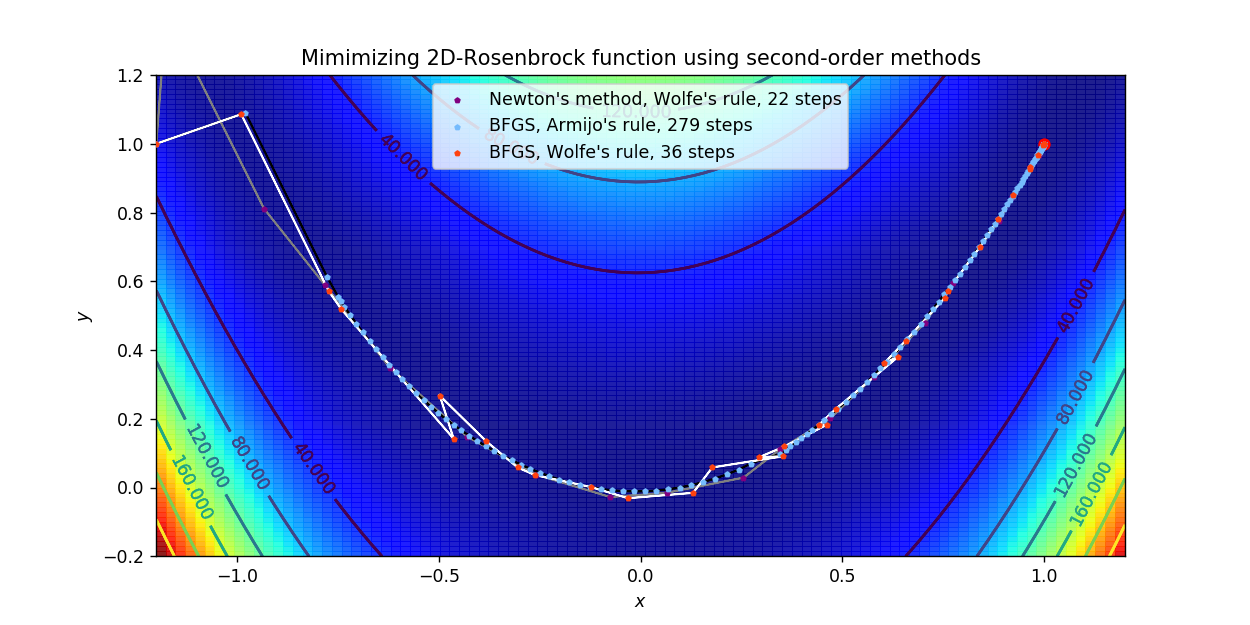

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
marker_colors = ["purple", "xkcd:sky blue", "xkcd:orangered"]
arrow_colors = ["gray", "black", "white"]
labels = [
    "Newton's method, Wolfe's rule, {} steps".format(newton_wolfe_steps.shape[0]),
    "BFGS, Armijo's rule, {} steps".format(bfgs_armijo_steps.shape[0]),
    "BFGS, Wolfe's rule, {} steps".format(bfgs_wolfe_steps.shape[0])
]
for i, steps in enumerate([newton_wolfe_steps, bfgs_armijo_steps, bfgs_wolfe_steps]):
    plot_trace(
        f=lambda x: rosen(x.T), 
        xlim=(-1.2, 1.2),
        ylim=(-0.2, 1.2),
        steps=steps,
        annotate=False,
        ax=ax,
        cmap="jet",
        label=labels[i],
        title="Mimimizing 2D-Rosenbrock function using second-order methods",
        scatter_kwargs={"color":marker_colors[i], "s":8},
        arrow_kwargs={"color":arrow_colors[i]},
        annot_kwargs={"size":8, "color":"white"}
    )
plt.show()

In [110]:
import scipy.stats as sps

n = 2
m = 5
x0 = np.zeros((n,))
A = np.random.rand(n, m) / 10

center_f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
center_grad = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
center_hess = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

newton_wolfe_steps = []
newton(
    f=center_f, grad=center_grad, hess=center_hess, 
    x0=x0, 
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(grad(x)) < tol, 
    step_size=wolfe_linesearch, 
    callback=newton_wolfe_steps.append
)
newton_wolfe_steps = np.vstack(newton_wolfe_steps)
bfgs_wolfe_steps = []
bfgs(
    f=center_f, grad=center_grad,
    x0=x0, tol=tol, 
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(grad(x)) < tol, 
    step_size=wolfe_linesearch, 
    callback=bfgs_wolfe_steps.append
);
bfgs_wolfe_steps = np.vstack(bfgs_wolfe_steps)
bfgs_armijo_steps = []
bfgs(
    f=center_f, grad=center_grad, 
    x0=x0, tol=tol, 
    stop_criterion=lambda x, h, f, grad, tol: np.linalg.norm(grad(x)) < tol, 
    step_size=armijo_linesearch, 
    callback=bfgs_armijo_steps.append
);
bfgs_armijo_steps = np.vstack(bfgs_armijo_steps)

In [111]:
print("Optimal value =", f(newton_wolfe_steps[-1]))

Optimal value = -0.043793930464258245


<IPython.core.display.Javascript object>


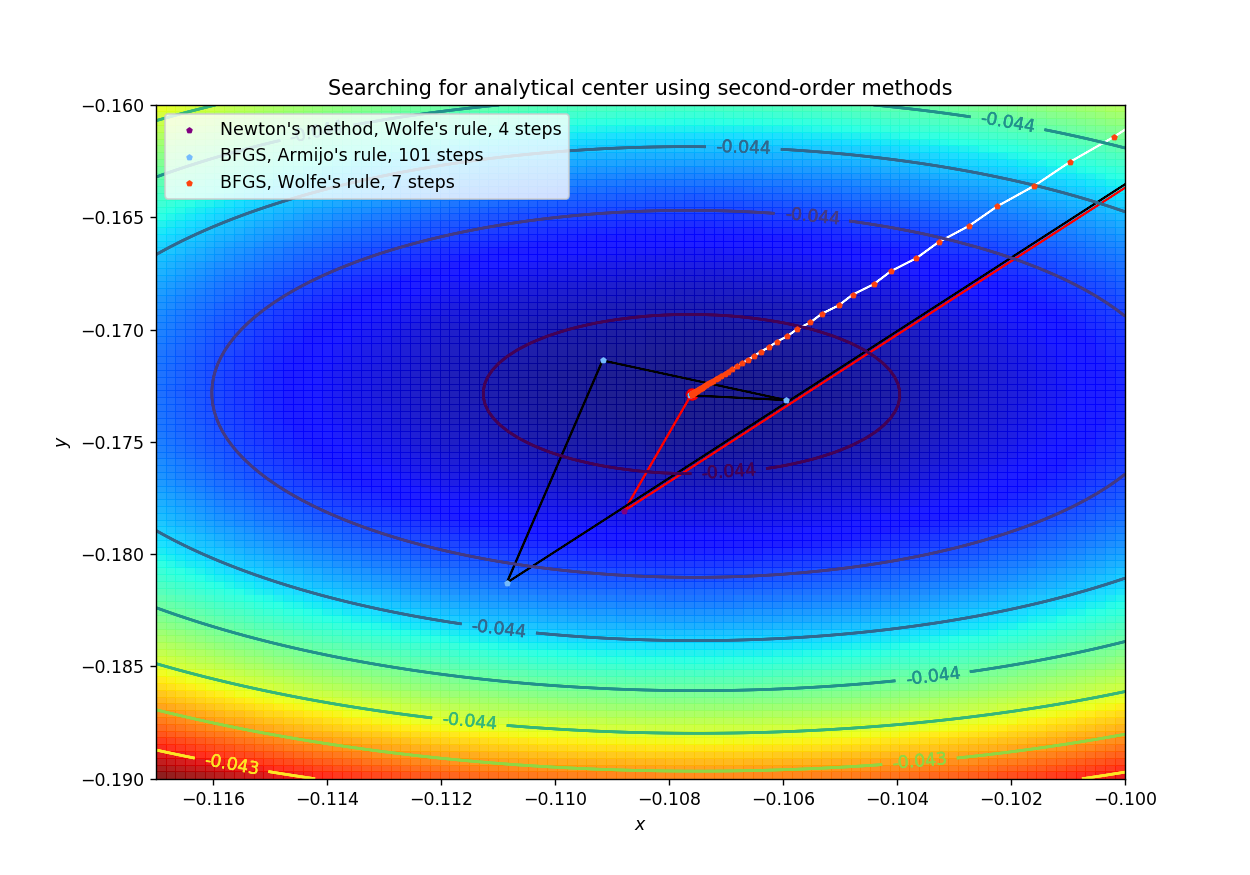

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
marker_colors = ["purple", "xkcd:sky blue", "xkcd:orangered"]
arrow_colors = ["red", "black", "white"]
labels = [
    "Newton's method, Wolfe's rule, {} steps".format(newton_wolfe_steps.shape[0]),
    "BFGS, Armijo's rule, {} steps".format(bfgs_armijo_steps.shape[0]),
    "BFGS, Wolfe's rule, {} steps".format(bfgs_wolfe_steps.shape[0])
]
xcoords = np.hstack((newton_wolfe_steps[:, 0], bfgs_wolfe_steps[:, 0], bfgs_armijo_steps[:, 0]))
ycoords = np.hstack((newton_wolfe_steps[:, 1], bfgs_wolfe_steps[:, 1], bfgs_armijo_steps[:, 1]))
xlim = (np.min(xcoords), np.max(xcoords))
ylim = (np.min(ycoords), np.max(ycoords))
offset = 0.05 * np.asarray([-1,1])
for i, steps in enumerate([newton_wolfe_steps, bfgs_wolfe_steps, bfgs_armijo_steps]):
    plot_trace(
        f=np.vectorize(f, signature="(n)->()"), 
        xlim=(-0.117, -0.1), #xlim+offset,
        ylim=(-0.19, -0.16),#ylim+offset,
        steps=steps,
        annotate=False,
        ax=ax,
        cmap="jet",
        draw_background=True,
        label=labels[i],
        title="Searching for analytical center using second-order methods",
        scatter_kwargs={"color":marker_colors[i], "s":8},
        arrow_kwargs={"color":arrow_colors[i], "width":1e-5},
        annot_kwargs={"size":8, "color":"black"}
    )
plt.show()

**Сравнение с точным решением, найденным cvxpy:**

In [125]:
import cvxpy as cvx
x = cvx.Variable((n, 1))

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True, max_iters=1000)
print("Optimal value =", prob.value)

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 25, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 11, constraints m = 27
Cones:	soc vars: 6, soc blks: 2
	exp vars: 21, dual exp vars: 0
Setup time: 5.13e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.41e+19  2.90e+19  8.12e-01 -2.28e+20 -2.36e+19  1.07e+20  5.25e-03 
    20| 6.57e-06  4.98e-06  1.71e-06 -4.38e-02 -4.38e-02  2.19e-05  1.69e-02 
----------------------------------------------------------

**Вывод:** Как и ожидалось, в обоих экспериментах алгоритмы по убыванию скорости сходимости расположились в таком порядке: метод Ньютона, BFGS с условиями Вольфе, BFGS с условиями Армихо. Логично, что метод Ньютона сходится быстрее своих апрроксимаций. Тем не менее, он более сложный вычислительно, т.к. требует явного вычисления градиента. Также ожидаемо, что правило Армихо даёт худший результат, чем правило Вольфе, т.к. только последнее гарантирует, что найденное направление обязательно будет направлением убывания. Также правило Армихо страдает от заметной коллинеарности направлений, чего не допускает правило Вольфе: эффект бросается в глаза. Т.е. несмотря на то, что константы как-то так удачно подогнались, что условие убывания в BFGS всегда было выполнено, метод Армихо всё равно оказался неудачным выбором.

## Задача 4*

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 3. Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 
Для вдохновения посморите, как строится метод Barzilai-Borwein и почему он собственно квазиньютоновский.

In [ ]:
# Место для Вашего решения